
# WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [19]:
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(7,5))
    fig.suptitle(title, fontsize='12')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='teal', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    plot_name.legend(loc='best')
    
    plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
    
    return plt.show()

#  Perform API Calls
Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
_api_city = []
_api_cloudiness = []
_api_country = []
_api_date = []
_api_humidity = []
_api_lat = []
_api_lng = []
_api_max_temp = []
_api_wind_speed = []
_api_cities_dict = {}

_open_weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
print('Beginning Data Retrieval\n-----------------------------')
for i in cities:
    _query_url = _open_weather_url + 'q='+i+'&appid='+api_key
    _api_data = requests.get(_query_url).json()
    if(_api_data['cod'] == 200):
        print("Retrieving data from " + str(i))
        _api_city.append(i)
        _api_cloudiness.append(_api_data['clouds']['all'])
        _api_country.append(_api_data['sys']['country'])
        _api_date.append(_api_data['dt'])
        _api_humidity.append(_api_data['main']['humidity'])
        _api_lat.append(_api_data['coord']['lat'])
        _api_lng.append(_api_data['coord']['lon'])
        _api_max_temp.append(_api_data['main']['temp_max'])
        _api_wind_speed.append(_api_data['wind']['speed'])
    else:
        print(str(i) + ' not found. Skipping...' )

Beginning Data Retrieval
-----------------------------
Retrieving data from punta arenas
Retrieving data from agadir
Retrieving data from mar del plata
Retrieving data from tangshan
Retrieving data from vila
Retrieving data from salalah
Retrieving data from iskateley
Retrieving data from albany
Retrieving data from ribeira grande
Retrieving data from kavieng
Retrieving data from ushuaia
Retrieving data from kaitangata
Retrieving data from saint george
Retrieving data from tuktoyaktuk
Retrieving data from port elizabeth
Retrieving data from hithadhoo
Retrieving data from saint-philippe
Retrieving data from lagoa
Retrieving data from levikha
Retrieving data from butaritari
Retrieving data from east london
Retrieving data from yellowknife
Retrieving data from kholodnyy
Retrieving data from faya
Retrieving data from torbay
Retrieving data from bredasdorp
kadykchan not found. Skipping...
Retrieving data from flin flon
Retrieving data from mendi
Retrieving data from antalaha
Retrieving data 

Retrieving data from ellisras
Retrieving data from husavik
Retrieving data from norman wells
Retrieving data from alyangula
Retrieving data from daru
Retrieving data from kiruna
Retrieving data from dzhebariki-khaya
Retrieving data from auch
Retrieving data from spassk-ryazanskiy
Retrieving data from la primavera
Retrieving data from hovd
Retrieving data from kamojima
Retrieving data from jalu
svetlyy not found. Skipping...
sentyabrskiy not found. Skipping...
palabuhanratu not found. Skipping...
Retrieving data from spencer
Retrieving data from pisco
tasbuget not found. Skipping...
Retrieving data from fortuna
Retrieving data from esna
Retrieving data from sovetskaya gavan
Retrieving data from bereda
Retrieving data from jiaozuo
Retrieving data from umm kaddadah
Retrieving data from tecoanapa
Retrieving data from puerto cabello
Retrieving data from acajutla
Retrieving data from kruisfontein
Retrieving data from xinzhi
Retrieving data from port macquarie
asau not found. Skipping...
Retr

Retrieving data from auki
yingshang not found. Skipping...
Retrieving data from glendive
Retrieving data from bossangoa
karaul not found. Skipping...
Retrieving data from kirakira
Retrieving data from adre
Retrieving data from port-gentil
Retrieving data from muroto
Retrieving data from harlingen
Retrieving data from madan
Retrieving data from ludvika
Retrieving data from nuevo progreso
Retrieving data from southaven
Retrieving data from henties bay
Retrieving data from plouzane
Retrieving data from vila do maio
Retrieving data from antofagasta
Retrieving data from aksarayskiy
Retrieving data from najran
Retrieving data from tigbinan
ngukurr not found. Skipping...
yirol not found. Skipping...
makung not found. Skipping...
Retrieving data from iracoubo
Retrieving data from solnechnyy
bolungarvik not found. Skipping...
Retrieving data from yago
Retrieving data from troitsko-pechorsk
Retrieving data from balad
Retrieving data from dosso
Retrieving data from barabinsk
Retrieving data from 

In [5]:
_api_cities_dict = list(zip(_api_city, _api_cloudiness, _api_country, _api_date, 
                            _api_humidity, _api_lat, _api_lng, _api_max_temp,_api_wind_speed))


#  Convert Raw Data to DataFrame
Export the city data into a .csv.

Display the DataFrame

In [6]:
_openweather_info_df = pd.DataFrame(_api_cities_dict,
                                   columns=['City','Cloudiness','Country','Date','Humidity','Lat',
                                            'Lng','Max Temp','Wind Speed'])

In [7]:
citys_df = _openweather_info_df.to_csv(output_data_file)

In [8]:
_openweather_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,0,CL,1563555537,76,-53.16,-70.91,277.150,7.70
1,agadir,0,MA,1563555072,57,30.42,-9.58,298.150,6.70
2,mar del plata,77,AR,1563555255,39,-46.43,-67.52,281.146,12.74
3,tangshan,51,CN,1563554957,87,39.63,118.17,295.646,2.80
4,vila,0,IT,1563555538,45,45.18,8.40,303.710,3.60


#  Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

Save the plotted figures as .pngs.

In [ ]:
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(7,5))
    fig.suptitle(title, fontsize='12')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='teal', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    plot_name.legend(loc='best')
    
    plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
    
    return plt.show()

#  Latitude vs. Temperature Plot

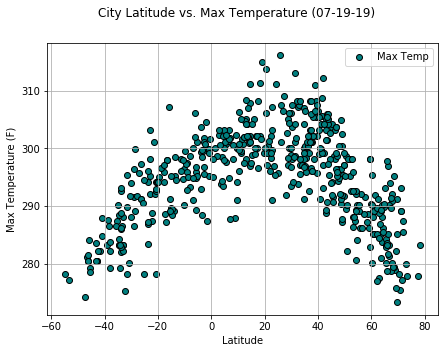

In [20]:
weather_plot('lat_vs_temperature', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Max Temp'],
             'City Latitude vs. Max Temperature (07-19-19)',
             'Latitude', 
             'Max Temperature (F)')


# Latitude vs. Humidity Plot

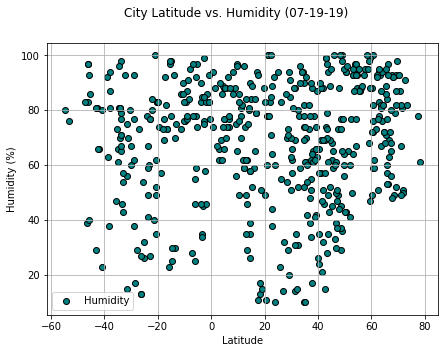

In [21]:
weather_plot('lat_vs_humidity', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Humidity'], 
             'City Latitude vs. Humidity (07-19-19)', 
             'Latitude', 
             'Humidity (%)')


# Latitude vs. Cloudiness Plot

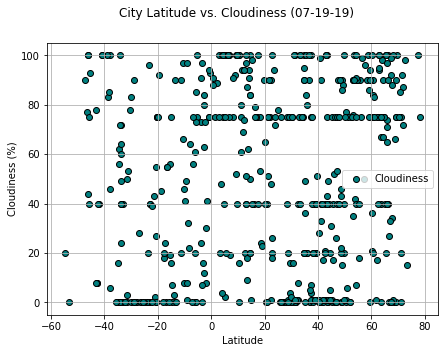

In [22]:
weather_plot('lat_vs_cloudiness', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Cloudiness'], 
             'City Latitude vs. Cloudiness (07-19-19)', 
             'Latitude', 
             'Cloudiness (%)')

# Latitude vs. Wind Speed Plot


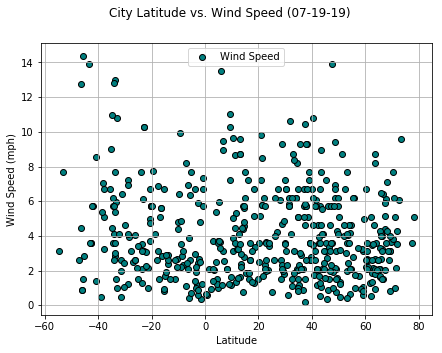

In [23]:
weather_plot('lat_vs_wind_speed', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Wind Speed'], 
             'City Latitude vs. Wind Speed (07-19-19)', 
             'Latitude', 
             'Wind Speed (mph)')